In [1]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def emerg(t):
    '''
    Функция для генерации 1 измерения, относящегося к аварийным
    '''
    T = random.uniform(0.5, 1)
    w = 2 * np.pi / T

    func = random.choice([0, 1])
    if func == 1: 
        a = random.uniform(0.05, 0.35) * np.exp(random.uniform(0.8, 1.2) * 0.2 * t) \
        * np.sin(w * t + random.randint(1, 4) * random.random()) + 1
        return a
    if func == 0:
        a = random.uniform(0.05, 0.35) * np.exp(random.uniform(0.8, 1.2) * 0.2 * t) \
        * np.cos(w * t + random.randint(1, 4) * random.random()) + 1
        return a

In [3]:
def norm(t):
    '''
    Функция для генерации 1 измерения, относящегося к нормальным
    '''
    T = random.uniform(0.5, 1)
    w = 2 * np.pi / T

    func = random.choice([0, 1])
    if func == 1: 
        a = random.uniform(0.05, 0.15) * np.exp(random.uniform(0.8, 1.2) * 0.13 * t) \
        * np.sin(w * t + random.randint(1, 4) * random.random()) + 1
        return a
    if func == 0:
        a = random.uniform(0.05, 0.15) * np.exp(random.uniform(0.8, 1.2) * 0.13 * t) \
        * np.cos(w * t + random.randint(1, 4) * random.random()) + 1
        return a

In [4]:
def count_per(mas, start, stop):
    '''
    считает количество точек за границами (проверяет их от start до stop)
    '''
    c = 0
    for i in range(len(mas)):
        if mas[i] - 1 >= 0 and mas[i] >= 1.2:
            c += 1
        if mas[i] - 1 <= 0 and mas[i] <= 0.75:
            c += 1
    if c in [start, stop]:
        return True
    else:
        return False

True


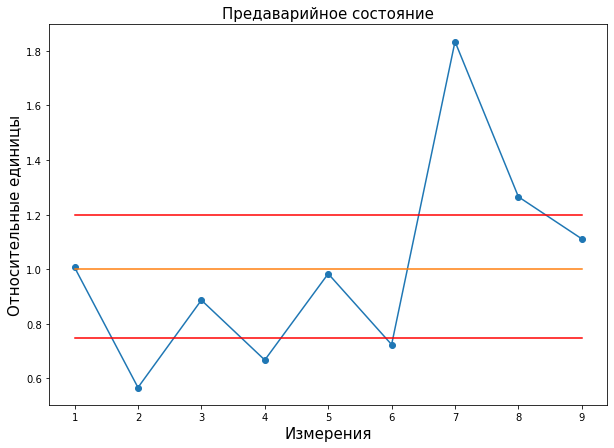

In [49]:
mas_y = [emerg(t) for t in range(0, 9)]
mas_x = [i for i in range(0, 9)]

print(count_per(mas_y, 5, 6))

plt.figure(figsize=(10, 7))
plt.plot(mas_x, mas_y)
plt.scatter(mas_x, mas_y)
plt.plot([0, 8], [1, 1])
plt.plot([0, 8], [1.2, 1.2], color='red')
plt.plot([0, 8], [0.75, 0.75], color='red')
plt.xticks(ticks=[i for i in range(0, 9)], labels=[i for i in range(1, 10)])
plt.title('Предаварийное состояние', fontsize=15)
plt.xlabel('Измерения', fontsize=15)
plt.ylabel('Относительные единицы', fontsize=15)
#plt.grid() сетка
plt.show()

True


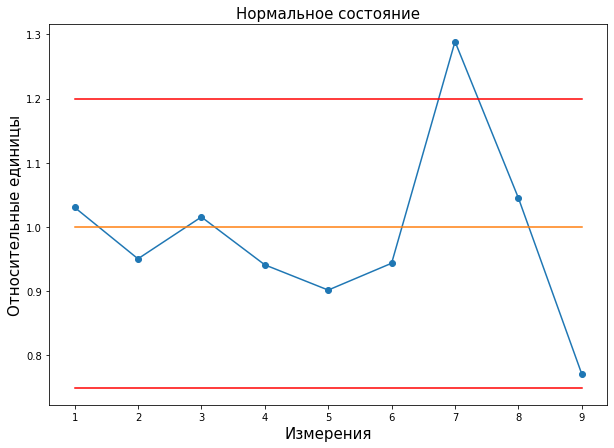

In [57]:
mas_y = [norm(t) for t in range(0, 9)]
mas_x = [i for i in range(0, 9)]

print(count_per(mas_y, 1, 2))
plt.figure(figsize=(10, 7))
plt.plot(mas_x, mas_y)
plt.scatter(mas_x, mas_y)
plt.plot([0, 8], [1, 1])
plt.plot([0, 8], [1.2, 1.2], color='red')
plt.plot([0, 8], [0.75, 0.75], color='red')
plt.xticks(ticks=[i for i in range(0, 9)], labels=[i for i in range(1, 10)])
plt.title('Нормальное состояние', fontsize=15)
plt.xlabel('Измерения', fontsize=15)
plt.ylabel('Относительные единицы', fontsize=15)
#plt.grid() сетка
plt.show()

In [28]:
i = 0
norm_mas = []

while i < 60:
    mas = [norm(t) for t in range(0, 9)]
    if count_per(mas, 1, 2):
        norm_mas.append(mas)
        i += 1

norm_mas = np.array(norm_mas).reshape(30, 18)

In [29]:
i = 0
emerg_mas = []

while i < 60:
    mas = [emerg(t) for t in range(0, 9)]
    if count_per(mas, 5, 6):
        emerg_mas.append(mas)
        i += 1

emerg_mas = np.array(emerg_mas).reshape(30, 18)

In [30]:
cols = [f'T_{i}' for i in range(1, 10)] + [f'P_{i}' for i in range(1, 10)]

In [31]:
emerg_df = pd.DataFrame(data = emerg_mas, columns=cols)
emerg_df['type'] = 1

In [32]:
norm_df = pd.DataFrame(data = norm_mas, columns=cols)
norm_df['type'] = 0

In [33]:
df = pd.concat([norm_df, emerg_df], axis=0).reset_index().drop(columns='index')

In [35]:
df

,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,type
0,0.988318,1.093251,1.083469,1.165460,0.969491,1.252482,0.865990,1.129771,0.915594,1.067473,0.881141,1.090764,0.831008,0.868378,1.084258,0.901330,0.744772,0.767373,0
1,0.989926,1.003881,0.858747,1.195742,0.899751,1.204953,0.780008,0.992720,1.092409,1.077347,0.917354,1.097860,0.782680,1.190886,0.922824,0.932821,0.711348,1.288030,0
2,1.073964,1.112697,1.094775,1.198566,1.048702,0.954273,1.181853,1.260888,0.672441,1.082118,0.956543,1.037929,1.089916,0.951161,0.983606,1.049452,1.160581,1.242690,0
3,0.978720,1.028545,0.918874,0.934199,0.937955,1.232217,0.863124,1.070060,0.780397,1.080781,1.087376,1.066794,0.947632,0.908319,0.750480,1.132001,1.212734,0.925766,0
4,1.115435,0.953513,1.139481,1.185438,0.841400,0.824206,1.080842,0.910154,0.610613,0.901822,0.898938,0.975673,1.115187,0.876886,1.062778,0.792041,1.304349,1.235919,0
5,1.067468,1.011202,1.027803,0.842444,1.109568,1.187982,1.052868,0.770579,1.326880,1.006382,0.957185,1.105370,1.106185,1.009425,1.125302,1.096555,1.281063,1.140742,0
6,1.120559,1.072468,0.956644,0.918290,0.952730,0.972477,1.129254,0.670284,1.118164,1.106021,0.853041,1.152945,0.939381,1.046251,0.754116,1.301413,1.085548,1.236373,0
7,1.074848,0.859354,1.079855,0.893554,1.219440,1.119367,1.195225,1.069791,0.749689,1.067758,1.075933,1.013454,1.159793,1.003031,1.089486,0.857259,0.896822,0.645208,0
8,0.912854,0.936818,1.072328,1.090704,1.194950,0.873196,1.155011,1.232740,1.366962,1.104984,0.943445,0.926366,0.938887,1.071206,0.999245,1.153965,1.248122,1.085972,0
9,1.130621,0.947713,0.926273,0.946475,1.146200,1.167761,0.844670,1.112684,0.704454,0.995548,1.154053,1.098929,1.072082,0.936017,1.190812,0.929882,0.699298,0.741805,0


In [45]:
X = df.drop(columns='type')
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=0)

In [46]:
C = 1
svc_classifier = svm.SVC(kernel='rbf', C=1, gamma='scale').fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)
print(f'Точность предсказаний составила {round(accuracy_score(y_pred, y_test)) * 100}%')

Точность предсказаний составила 100%
